## Math for ML: Numerical Computation

In this section of Math for ML we'll discuss the basics of numerical computation. This includes what integers and floating point numbers are and how they're represented on a computer, as well as an introduction to numpy and array-based computing.

Let's start by talking a bit about numbers and how they're represented on computers. This may seem too basic to mention, but it's actually very important. There's a lot of subtlety involved. Recall that in python and most other languages there are several different *types* of numbers. The most important being integers (ints) and floating point numbers (floats).

In [1]:
from utils import *

In [2]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Integers

Integers are whole numbers that can be positive, negative, or zero. Examples are 5, 100151, 0, -72, etc. 

**Notation:** Math folks like to represent the "set" of integers by the "block Z" symbol, $\mathbb{Z}$. To say that "x is an integer" we can use the shorthand $x \in \mathbb{Z}$.

In python, ints are builtin objects of type `int` that more or less follow the rules that integers in math follow.

Among other things, the following operations can be performed with integers:
- Addition: $2 + 2 = 4$.
- Subtraction: $2 - 5 = -3$.
- Multiplication: $3 * 3 = 9$.
- Exponentiation: $2^3 = 2*2*2 = 8$ (in python this is the `**` operator, e.g. `2 ** 3 = 8`).
- Remainder (or Modulo): the remainder of 10 when divided by 3 is 1, written $10 \text{ mod } 3 = 1$ (in python this is the `%` operator, e.g. `10 % 3 = 1`).

If any of these operations are applied to two integers, the output will itself always be an integer.

Here are a few examples.

In [3]:
2 + 2
2 - 5
3 * 3
10 % 3
2 ** 3

4

-3

9

1

8

What about division? You can't always divide two integers and get another integer. What you have to do instead is called integer division. Here you divide the two numbers and then round the answer down to the nearest whole number. Since $5 \div 2 = 2.5$, the nearest rounded down integer is 2. 

In math, this "nearest rounded down integer" 2 is usually called the **floor** of 2.5, and represented with the funny symbol $\lfloor 2.5 \rfloor.$ Using this notation we can write the above integer division as 
$$\big\lfloor \frac{5}{2} \big\rfloor = 2.$$

In python, integer division is done using the `//` operator, e.g. `5 // 2 = 2`. Thus, I'll usually just write $5 \ // \ 2$ instead in this book,
$$5 \ // \ 2 = \big\lfloor \frac{5}{2} \big\rfloor = 2.$$
I personally like this notation better than $\lfloor \frac{5}{2} \rfloor$ since it's closer to python, and hence easier to translate to code.

In [4]:
5 // 2

2

We can also do regular division `/` with ints, but the output will *not* be an integer even if the answer should be, e.g. `4 / 2`. Only integer division is guaranteed to return an integer. We'll get to this shortly.

In [5]:
4 / 2
type(4 / 2)

2.0

float

In [6]:
4 // 2
type (4 // 2)

2

int

Division by zero is of course undefined for both division and integer division. In python it will always raise a `ZeroDivisionError` like so.

In [7]:
4 / 0

ZeroDivisionError: division by zero

In [8]:
4 // 0

ZeroDivisionError: integer division or modulo by zero

### Representing Ints

Just like every other data type, on a computer integers are *actually* represented internally as a sequence of bits. The number of bits used to represent the integer is called its *word size*. In python the typical word size is 64 bits.


**Aside:** Since there are $2^{64}$ possible numbers in 64 bits, python *should* only be able to represent $2^{64}$ integers. Assuming integers can be negative, that would mean only integers in the range $[-2^{63}+1, 2^{63}-1]$ should be valid, i.e. only the integers $-2^{63}+1, -2^{63}+2, \cdots, -1, 0, 1, \cdots, 2^{63}-2, 2^{63}-1$. This is essentially true in older versions of pythons as well as most older programming languages like C or C++. But it turns out newer versions of python have tricks that allow you to represent essentially arbitrarily large and integers.

In [9]:
2 ** 63 - 1 # should be the max integer allowed
2 ** 100 # but this much bigger number is represented just fine!

9223372036854775807

1267650600228229401496703205376

This interesting fact aside, integers are represented in bits more or less by their binary representation. For example, consider the integer 6. This is `110` in binary. It would be represented in 64 bits with one bit at the beginning to indicate its sign (in this case `0` since the sign is positive), 63-3=60 bits of leading zeros, and finally the binary sequence `110`. Our representation for the integer 6 thus might look something like this:
```
0    000000000000000000000000000000000000000000000000000000000000    110
sign bit (0=+, 1=-)      60 leading zeros                3 bits for bin(6) = 110
```

**Aside:** In real life integers are usually represented on a computer using what's called the *two's complement* representation. It's very similar to what I just described, except it handles negative numbers slightly differently by flipping the bits at the end and adding 1. There are advantages to doing it this way, but in my opinion this isn't worth dwelling on in this book.

Rather than waste valuable time trying to teach you (or remind you) how to convert numbers to binary and back by hand, I'll just mention that we can easily get the binary representation of an integer in python by using the `bin` function. The `bin` function returns the binary representation of an int as a string beginning with `0b`. To go back to the decimal form just use `int` on the binary string.

In [10]:
bin(6)

'0b110'

In [11]:
int(0b110)

6

It's worth visualizing what integers look like on the number line, if for nothing else than to compare it with what floats look like later on. To do so I'm going to create a fake 6-bit integer system and plot them. These ints will run from $-2^{5}=-32$ to $2^{5}-1=31$. The asymmetry has to do with the inclusion of $0$. The fact that exponent is 5 and not 6 is because the last bit is used for the sign of the integer. 

To plot these ints I'm going to use the helper function `plot_number_dist`. When plotted, these ints should take equally-spaced discrete dots at each integer from -32 to 31, which is what we see.

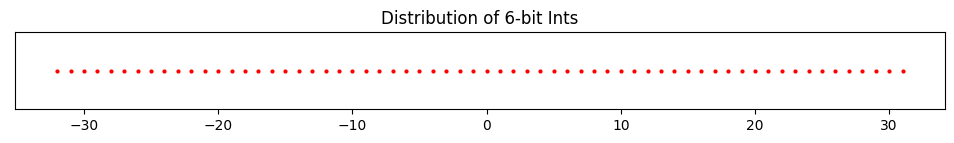

In [48]:
six_bit_ints = range(-2**5, 2**5)
plot_number_dist(six_bit_ints, title='Distribution of 6-bit Ints')

Technically the integers I've described above are what are called **signed integers**. They can be positive or negative. We can also have **unsigned integers**, which are ints that can only be positive. Unsigned ints work basically the same as signed ints, except they don't need the sign bit, so they can use all bits to represent the number itself. 

Python natively implements ints as signed, and that's usually what we care about. But unsigned ints sometimes show up.
For example, a popular choice in recent years is to use 8-bit unsigned ints to encode the parameters of a neural network in a lookup table. This is called model quantization, and is used to make the model take up much less disk space than it otherwise would.

## Floats

What if we want decimal numbers or fractions instead of whole numbers, like 1.2 or 0.99999 or 3.1415926 or 1/2? To do this we need a new system of numbers called floating point numbers, or **floats**. Floats are an attempt to represent what in math are called **real numbers**. As we'll see, floats can't represent all real numbers *exactly* because they can't express numbers with arbitrary many digits. Nevertheless, they're a reasonably good approximation to the idea of the real number line.

**Notation:** Math folks like to express the set of real numbers using the "block R" symbol $\mathbb{R}$, and write "x is a real number" as $x \in \mathbb{R}$.

In python, floats are builtin objects of type `float`. They approximate real numbers with a given degree of precision (we'll get to this shortly).

Floats obey pretty much the same operations that integers do with some minor exceptions:
- Addition: $1.2 + 4.3 = 5.5$.
- Subtraction: $1.2 - 4.3 = -3.1$.
- Multiplication: $1.2 * 4.3 = 5.16$.
- Exponentiation: $4.3^2 = 18.49$.
- Remainder (or Modulo): $4.3 \text{ mod } 1.2 = 0.7$.
- Integer Division: $4.3 \ // \ 1.2 = 3.0$.
- Division: $4.3 \div 1.2$.

Let's print these out in python and verify the answers are correct.

In [13]:
1.2 + 4.3
1.2 - 4.3
1.2 * 4.3
4.3 ** 2
4.3 % 1.2
4.3 // 1.2
4.3 / 1.2

5.5

-3.0999999999999996

5.159999999999999

18.49

0.7

3.0

3.5833333333333335

Most of them look right. But what the heck is going on with `1.2 - 4.3` and `1.2 * 4.3`? We're getting these weird trailing 9s. That gets to how floats are represented on your computer.

### Representing Floats

So how are floats represented on a computer? By default, python uses what's called **double precision** for floats, which means 64 bits are used to represent a float. This is just like with ints, except there's a major difference in how the number is represented. While ints are represented via their binary sequence, floats are represented in multiple pieces.

Generally speaking, a floating point number $x$ can be expressed in the form
$$x = (-1)^{\text{sign}} \cdot 2^{\text{exponent}-\text{bias}} \cdot \text{precision},$$
where $\text{sign}$ is the **sign bit** (which can be 0 or 1), while $\text{exponent}$ and $\text{precision}$ are values that each take up some number of bits depending on the floating point precision. The **exponent** determines what *power* to raise the float to, which affects the *range* of values the system can take on. The **precision** (or **significand**) determines the actual digits of precision you see. It's the bits used to represent the decimal places in the number essentially. There is also a fixed term called a **bias**, which is meant to control the trade-off between how much precision to show around zero vs larger numbers.

In the double precision (64-bit) floating point convention,
- 1 bit is used to represent the **sign**, 
- 11 bits to represent the **exponent**,
- the remaining 52 bits are used to represent the **precision**, and
- the **bias** is taken to be $1023=2^{10}-1$.

On top of all these floats, a few of them are also reserved for special values like positive and negative infinity, positive and negative zero (yes that's a thing), and the "not-a-number" or NaN.

Some consequence of this representation are:
- They can only represent values in the range of about $-10^{308}, \cdots, 10^{308}$.
- They can only express up to about $16$ decimal digits of precision. 
- For numbers around 0, the smallest possible numbers they can represent are about $\pm 10^{-308}$.
- For larger numbers, the gap between any two floats is at least $10^{-16}$, called **machine epsilon**.
- Any number that does not fall into this range either gets truncated to the nearest float or mapped to a special number like zero or infinity.

For example, what happens if we try to express the constant $\pi$ to its first [100 digits](https://www.wolframalpha.com/input?i=pi+to+100+digits) as a double precision float? It just gets truncated to its first 15 digits. Double precision is unable to keep track of the other 85 digits. They just get lost.

In [14]:
pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
pi

3.141592653589793

Another implication of the way floats are defined is that they are not equally spaced. That is, two nearby *small* floats are closer together than two nearby *large* floats. This seems kind of weird, but it's all due to the way the exponents are represented, which makes the smaller numbers have higher precision than larger numbers. Smaller exponents mean that the numbers are closer together, while larger exponents mean that the numbers are further apart.

Let's try to visualize this in a plot so it's easier to grasp. To do so, I'll look at the much simpler system of 8-bit floating point. I'll use 3 bits for the precision, 4 for the exponent, and 1 for the sign. I'll also use a bias of 10. 

I'll generate all possible 8-bit floats using the helper function `gen_all_floats`, passing in the number of precision bits `n_precision=3`, the number of exponent bits `n_exp=4`, and the a bias `bias=10`

Let's also print out some statistics to see some properties of this 8-bit floating point system. I'll look at how many numbers there are, the most negative float, the most positive float, the smallest non-zero float, and the machine epsilon.

When a number gets larger than the most positive (or negative) float, in this case 56, it's said to **overflow**. Any number larger than this will overflow to infinity (or negative infinity). When a number gets smaller than the the smallest nonzero number, in this case 0.001953125, it's said to **underflow**. Any number smaller than this will truncate down to zero (or negative zero). Overflow and underflow errors are some of the most common numerical bugs that occur in deep learning, and usually result from not handling floats correctly.

In [15]:
eight_bit_floats = gen_all_floats(n_precision=3, n_exp=4, bias=10)
print(f'Total number of 8-bit floats: {len(eight_bit_floats)}')
print(f'Most negative float: {min(eight_bit_floats)}')
print(f'Most positive float: {max(eight_bit_floats)}')
print(f'Smallest nonzero float: {min([x for x in eight_bit_floats if x > 0])}')
print(f'Machine Epsilon: {min([x for x in eight_bit_floats if x > 1]) - 1}')

Total number of 8-bit floats: 120
Most negative float: -56.0
Most positive float: 56.0
Smallest nonzero float: 0.001953125
Machine Epsilon: 0.25


With these numbers in hand let's now plot their distribution on the number line again using the helper function `plot_number_dist` function. Compare with the plot of ints I did above.

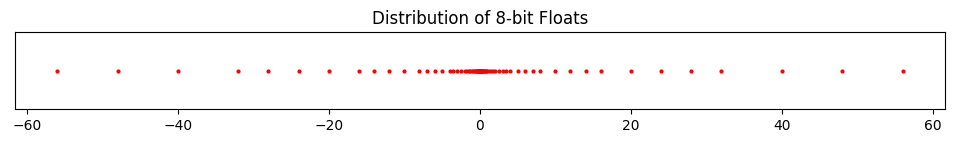

In [16]:
plot_number_dist(x, title='Distribution of 8-bit Floats')

Remember, I'm plotting *all* possible 8-bit floating point values here, except the special values $\pm 0, \pm \infty, \text{NaN}$. What I want you to observe is that we can't even represent all possible numbers in the range $-56, \cdots, 56$. In fact, not even most of them. For example, the numbers in $-10, \cdots, 10$ are getting represented *much* more than the ones from $-56, \cdots, -10$ or $10, \cdots, 56$. The numbers around $0$ are much closer to each other than the numbers around $\pm 56$.

Feel free to play around with these two functions and see how the distribution of floats changes for different choices of `n_precision`, `n_exp`, and `bias`. Be careful not to make `n_exp` too large though or you may crash the kernel.

This same fact is true for double precision numbers, except there are a lot more of them. Doubles can represent a lot more numbers, but they still have gaps. Numbers close to $0$ are much closer together than the ones near the endpoints at around $\pm 10^{308}$.

One practical example where this non-equal spacing issue can become something to worry about is when subtracting two floats of vastly different sizes. For example, the number $10^{100}-1$, written `1e100 - 1` in python, doesn't even exist in double precision. We just get `1e100`. That is, python thinks $10^{100}-1 = 10^{100}$. However, for a much smaller number like $1000$, $1000-1=999$ works just fine.

In [17]:
1e100 - 1
1000 - 1

1e+100

999

There is also a minimum number greater than zero. In double precision, that number is $2^{-1022}$, or about $2 \cdot 10^{-308}$. In practice, python seems to stop at around $10^{-323}$ as we can see below. This arises from the fact that python also uses something called **subnormal numbers**, which is a way to get slightly better precision around zero. It doesn't change anything we've discussed, it just creates more really small numbers close to zero.

In [18]:
1e-323
1e-324

1e-323

0.0

These issues explain why we got the weird results above when subtracting `1.2 - 4.3`. The imperfect precision in the two numbers resulted in a numerical roundoff error, leading in the trailing 9s that should've rounded up to -3.1 exactly. In fact, subtracting floats is one of the most dangerous operations to do, as it tends to lead to the highest loss of precision in calculations. The closer two numbers are to being equal the worse this loss of precision gets.

In [19]:
1.2 - 4.3

-3.0999999999999996

As mentioned, floating point also defines a few special values: $\pm \infty$, $\pm 0$, and $\text{NaN}$. The infinity values are used to represent values too large to fit into a word size. The zeros are used for numbers too small to round up to the smallest float. The NaN value shows up when a number is undefined. For example, $\infty - \infty = \text{NaN}$ is undefined.

In base python these numbers are represented as:
- $\infty$: `float('inf')`, 
- $\infty$: `float('-inf')`, 
- $+0$: `+0`,
- $-0$: `-0`,
- $\text{NaN}$: `float('nan')`.

These special "numbers" show up all the time in machine learning, usually due to some kind of problem during training or some issue with the data, as we'll later see.

In [20]:
float('inf')
float('-inf')
0
-0
float('nan')

inf

-inf

0

0

nan

In [21]:
float('inf') + float('-inf') # infinity - infinity = NaN

nan

There are also other formats for for representing real numbers as well, some not even floating-point based. It turns out there are ways to represent real numbers using **fixed point** numbers instead. In fixed-point systems, numbers are represented in bits by using a certain number for the integer part (left of the decimal), and a certain number for the fractional part (after the decimal). No special attempt is made to represent the exponent. While this allows for a more evenly spaced grid of numbers, it also means you can't represent as wide a range of numbers for a given number of bits. For this reason, fixed point systems usually are not widely used.

As far as other floating point representations, while double precision is the python standard, there are other types of precision as well. For example, **single precision** uses 32 bits to represent a real number, while **half precision** uses 16 bits. These floating point formats are less precise than double precision since they can't represent as many numbers, but they do have their uses, as we'll see when we get to deep learning.

### Common Floating Point Pitfalls

To cap this long section on floats, here's a list of common pitfalls people run into when working with floating point numbers, and some ways to avoid each one. This is probably the most important thing to take away from this section. You may find it helpful to reference later on. See this [post](https://www.codeproject.com/Articles/29637/Five-Tips-for-Floating-Point-Programming) for more information.

1. Numerical overflow: Letting a number blow up to infinity (or negative infinity)
    - Clip numbers from above to keep them from being too large
    - Work with the log of the number instead
    - Make sure you're not dividing by zero or a really small number
    - Normalize numbers so they're all on the same scale
2. Numerical underflow: Letting a number spiral down to zero (or negative zero)
    - Clip numbers from below to keep them from being too small
    - Work with the exp of the number instead
    - Normalize numbers so they're all on the same scale
3. Subtracting floats: Avoid subtracting two numbers that are approximately equal
    - Reorder operations so approximately equal numbers aren't nearby to each other
    - Use some algebraic manipulation to recast the problem into a different form
    - Avoid differencing squares (e.g. when calculating the standard deviation)
4. Testing for equality: Trying to test exact equality of two floats
    - Instead of testing `x == y`, test for approximate equality with something like `abs(x - y) <= 1e-5`
    - Use functions like `np.allclose(x, y)`, which will do this for you
5. Unstable functions: Defining some functions in the naive way instead of in a stable way
    - Examples: factorials, softmax, logsumexp
    - Use a more stable library implementation of these functions
    - Look for the same function but in log form, e.g. `log_factorial` or `log_softmax`
6. Beware of NaNs: Once a number becomes NaN it'll always be a NaN from then on
    - Prevent underflow and overflow
    - Remove missing values or replace them with finite values

## Array Computing

In machine learning and most of scientific computing we're not interested in operating on just single numbers at a time, but many numbers at a time. This is done using *array operations*. The most popular library in python for doing numerical computation on arrays is NumPy, or **numpy**. Why not just use python lists, you ask? A couple of reasons for this. For one, numpy comes with all sorts of useful numerical functions that operate on entire arrays. Perhaps more importantly, numpy compiles large array operations down to low-level C code, which executes much faster. This means doing operations in numpy can save you a *huge* amount of time.

I'll start by importing numpy. We'll cover the important usages of each of these tools as we need them. Typically by convention, numpy is imported with the name `np`.

In [22]:
import numpy as np

### Arrays and Types

The fundamental object of numpy is the **array**. An array is very similar to a python list but supports all the numpy operations. To define an array, we can just define a python list and wrap it inside the function `np.array`. I'll create an array called `x` out of the list `[1, 2, 3, 4, 5]`.

In [23]:
x = np.array([1, 2, 3, 4, 5]); x

array([1, 2, 3, 4, 5])

Just like python numbers, numpy arrays are typed. We can have an array of ints, an array of floats, an array of strings, etc. Not *all* objects can be put inside a numpy array though. Only immutable types like ints, floats, strings, or tuples. To get the type of the numbers in an array, call the method `dtype` on `x`. In the array I just defined, the type is `int64`, which is the numpy equivalent of the regular python `int`, which has 64 bits.

In [24]:
x.dtype

dtype('int64')

The other type of importance is of course the float, which is `float64` in numpy. We can specify the type either by passing floats into the array initially, or by recasting the array explicitly using the `astype` method.

In [25]:
x = x.astype('float64')
x.dtype

dtype('float64')

Since arrays contain multiple values it's essential to know their **shape**. The shape of an array is the number of elements in each dimension of the array. To get the size of an array, use the `shape` method. It will return the number of values in each dimension of the array.

In [26]:
x.shape

(5,)

The number of different dimensions an array has is called its **rank** or **order**. Equivalently, the rank is just the length of the shape tuple.

The above array `x` is a rank-1 array with 5 elements. We can also define arrays with two, three, or any other number of dimensions we like. In math these arrays sometimes have special names depending on their dimension:
- A rank-0 array is called a **scalar** (i.e. just a single number).
- A rank-1 array is called a **vector**.
- A rank-2 array is called a **matrix**.
- A rank-3 or higher array is called a **tensor**.

Here's an example of each. Next to each I print out their numpy shapes followed by the array itself.

In [27]:
scalar = np.array(1.5)
scalar.shape
scalar

()

array(1.5)

In [28]:
vector = np.array([1, 2, 3])
vector.shape
vector

(3,)

array([1, 2, 3])

In [29]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
matrix.shape
matrix

(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
tensor = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
tensor.shape
tensor

(2, 2, 3)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

### Element-Wise Array Operations

As you'd expect, we can also do arithmetic with arrays as well. Suppose for example we have two arrays like so.

In [31]:
x = np.array([1, 2, 3]); x
y = np.array([4, 5, 6]); y

array([1, 2, 3])

array([4, 5, 6])

We can efficiently operate on all numbers in these arrays by using **element-wise arithmetic**. The idea is to treat arrays like numbers. We can add, subtract, multiply, divide them. We can apply common functions like exponentials or logarithms. The difference for arrays is that these operations are applied on each number individually.

For example, suppose we want to multiply `x` and `y` together. If we multiply each element index-by-index, or element-wise, we'd get something like this:
```python
x * y = [1 * 4, 2 * 5, 3 * 6] = [4, 10, 18].
```

In [32]:
x * y

array([ 4, 10, 18])

We can similarly do element-wise operations for addition, subtraction, multiplication by constants, exponentiation, even division.

In [33]:
x + y
x - y
2 * x
x ** y
x / y

array([5, 7, 9])

array([-3, -3, -3])

array([2, 4, 6])

array([  1,  32, 729])

array([0.25, 0.4 , 0.5 ])

We can also take element-wise sums, exponents, logs, sines, cosines, whatever we were doing with ints and floats before.

In [34]:
np.exp(x)
np.log(x)
np.sin(x)
np.cos(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

array([0.        , 0.69314718, 1.09861229])

array([0.84147098, 0.90929743, 0.14112001])

array([ 0.54030231, -0.41614684, -0.9899925 ])

Just like python lists, we can also sum the elements in an array using `np.sum`. If you just pass an array into `np.sum` with no other arguments, it will sum *every* element in the array, across all dimensions. If you only want to sum across a given dimension you need to pass in an `axis` argument specifying which dimension (i.e. axis) you want to sum over. Here's an example with a rank-2 array.

To sum across every element, use `np.sum(A)`. To sum across all the rows, use `np.sum(A, axis=0)`. To sum across all the columns, use `np.sum(A, axis=1)`. Note these will necessarily change the output shape of `A`. 

Alternatively, you can use the method `A.sum()` in a similar way, which is sometimes more convenient.

In [35]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape
A

(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [36]:
np.sum(A) # sum over all values in A

21

In [37]:
row_sums = A.sum(axis=1) # sum over all values in each row A
row_sums.shape
row_sums

(3,)

array([ 3,  7, 11])

In [38]:
col_sums = A.sum(axis=0) # sum over all values in each column A
col_sums.shape
col_sums

(2,)

array([ 9, 12])

Numpy also lets you calculate more aggregate operations over an array than just the sum. You can calculate the product of values in an array with `np.prod`, the cumulative sum with `np.cumsum`, the mean with `np.mean`, etc. We'll see examples of these as we go.

Operations like this make it really convenient and efficient to perform operations on large arrays of data, which is very helpful in machine learning. We'll do it *a lot* going forward, without even thinking about it.

## Broadcasting

To finish this section I want to talk a little bit about the concept of broadcasting, which is essentially a set of conventions for doing array operations on arrays with improper shapes. This may seem like a strange thing to do, but it turns out knowing how and when to broadcast can make your code much shorter, more readable, and efficient. All major numerical array libraries in modern-day python support broadcasting, including numpy, pytorch, tensorflow, etc. So it's a useful thing to learn.

### Motivation

Let's start with a simple example. Suppose we have an array of floats `x = np.array([1., 2., 3., 4., 5.])`. We'd like to add 1 to every number in the array. How can we do it? One "pythonic" way might be to use a list comprehension like so. This will work just fine, but it requires going back and forth between arrays and lists.

In [39]:
x = np.array([1., 2., 3., 4., 5.])
x

array([1., 2., 3., 4., 5.])

In [40]:
x_plus_1 = np.array([val + 1 for val in x])
x_plus_1

array([2., 3., 4., 5., 6.])

What if we didn't want to go back and forth like that? It is slow after all. Anytime numpy has to handoff back to python or vice versa it's going to slow things down. Another thing we could try is to make a vector of ones of the same size as `x`, then add it to `x`. This is also fine, but it requires defining this extra array of ones just to add 1 to the original array.

In [41]:
ones = np.ones(len(x))
x_plus_1 = x + ones
x_plus_1

array([2., 3., 4., 5., 6.])

We'd *like* to be able to just add 1 to the array like we would with numbers. If `x` were a single number we'd just write `x + 1` to add one to it, right? But technically we can't do this if `x` is an array, since `x` has shape `(5,)` and 1 is just a number with no shape. This is where broadcasting comes in. Broadcasting says let's *define* the operation `x + 1` so that it *means* add 1 to every element of `x`.

In [42]:
x_plus_1 = x + 1
x_plus_1

array([2., 3., 4., 5., 6.])

This notation has the advantage of keeping array equations simple, while at the same time keeping all operations in numpy so that they run fast.

### Broadcasting Rules

Suppose now that we have two arrays `A` and `B` of arbitrary shape and we want to operate on them, e.g. via the operations `+, -, *, /, //, **`. Here are the general broadcasting rules, quoted directly from the [numpy documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).

> **Numpy Documentation**<br><br>When operating on two arrays, numpy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are **compatible** when <br><br>1. they are equal, or<br>2. one of them is 1 <br><br>If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have **incompatible** shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Let's look at an example. First, suppose `A` has shape `(2, 2, 3)` and `B` has shape `(3,)`. Let's suppose for simplicity that they're both arrays of all ones. 

```
A: 2 , 2 , 3
B:         3
------------
C: 2 , 2 , 3
```

Here are the broadcasting steps that will take place. Note that only `B` will change in this example. `A` will stay fixed.
- Numpy will start in the rightmost dimension, checking if they're equal.
- Begin with `A` of shape `(2, 2, 3)` and `B` of shape `(3,)`.
- In this case, the rightmost dimension is `3` in both arrays, so we have a match.
- Moving left by one, `B` no longer has anymore dimensions, but `A` has two, each `2`. These arrays are thus compatible.
- Numpy will now copy `B` to the left in these new dimensions until it has the same shape as `A`.

```
1. Copy values of B twice to get 
   B = [[1, 1, 1], [1, 1, 1]] 
   with shape (2, 3)
2. Copy values of B twice to get 
   B = [[[1, 1, 1], [1, 1, 1]], [[1, 1, 1], [1, 1, 1]]] 
   with shape (2, 2, 3)
```
- The shapes of A and B are now equal. The output array `C` will have shape `(2, 2, 3)`.

Let's verify this is true on two simple arrays of ones. Let's also print out what `C` looks like. Since only copying is taking place we should just be adding 2 arrays of ones, hence the output should sum 2 arrays of ones, giving one array `C` of twos.

In [43]:
A = np.ones((2, 2, 3))
B = np.ones(3,)
A.shape, B.shape

((2, 2, 3), (3,))

In [44]:
C = A + B
C.shape
C

(2, 2, 3)

array([[[2., 2., 2.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [2., 2., 2.]]])

Let's do one more example. Suppose now that `A` has shape `(8, 1, 6, 1)` and `B` has shape `(7, 1, 5)`.

```
A: 8 , 1 , 6 , 1
B:     7 , 1 , 5
----------------
C: 8 , 7 , 6 , 5
```

Here are the broadcasting steps that will take place.
- Starting again from the right, dimensions `1` and `5` don't match. But since `A` has a `1` rule (2) applies, so `A` will broadcast itself (i.e. copy its values) 5 times in this dimension to match `B`. 
- Moving left by one we get `6` and `1`. Now `B` will broadcast itself in this dimension 6 times to match `A`. 
- Moving left again we get `1` and `7`. Now `A` will broadcast itself in this dimension 7 times to match `B`. 
- Last, we get `8` in `A` and `B` is out of dimensions, so `B` will broadcast itself 8 times to match `A`. 
- The shapes of `A` and `B` are now equal. The output `C` thus has shape `(8, 7, 6, 5)`.

Here again is an example on two arrays of ones. Verify that the shapes come out right.

In [45]:
A = np.ones((8, 1, 6, 1))
B = np.ones((7, 1, 5))
A.shape, B.shape

((8, 1, 6, 1), (7, 1, 5))

In [46]:
C = A / B
C.shape

(8, 7, 6, 5)

That's pretty much all there is to broadcasting. It's a systematic way of trying to copy the dimensions in each array until they both have the same shape. All this broadcasting is done under the hood for you when you try to operate on two arrays of different shapes. You don't need to do anything but understand *how* the arrays get broadcast together so you can avoid errors in your calculations, sometimes very subtle errors.

This can be a bit confusing to understand I'm sure. We'll practice broadcasting a good bit in future lessons to help you get the hang of it. Before long it should become second nature to you.